In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

### 3.10.1 Computing Yield to Maturity

In [1]:
def bond_value(c: float, T: float, r: float, par: float):
    """Computes bv = bond values (current prices) corresponding
    to all values of yield to maturity in the input vector r
    
    Parameters
    ==========
    c: float
        coupon payment (semiannual)
    T: float
        time to maturity (in years)
    r: float
        vector of yields to maturity (semiannual rates)
    par: float
        par value
    """
    return c / r + (par - c / r) * (1 + r)**(-2 * T)

In [2]:
price = 1200
C = 40
T = 30
par = 1000

In [13]:
r = np.linspace(0.02, 0.05, 300)
value = bond_value(C, T, r, par)
yield_interp = CubicSpline(value[::-1], r[::-1])

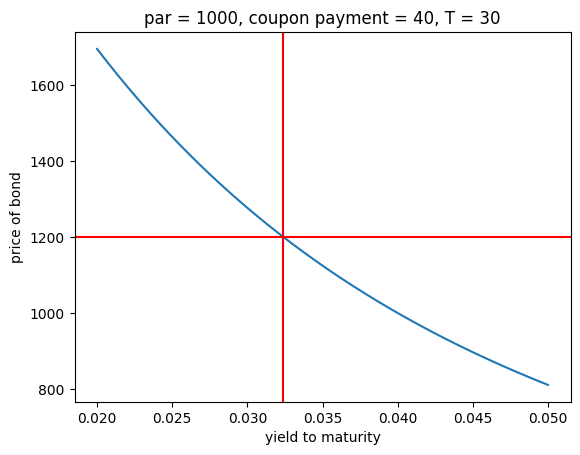

In [18]:
fig, ax = plt.subplots()
ax.plot(r, value)
ax.set_title('par = 1000, coupon payment = 40, T = 30')
ax.set_xlabel('yield to maturity')
ax.set_ylabel('price of bond')
ax.axvline(yield_interp(1200), color='red')
ax.axhline(1200, color='red')

#### Problem 1

The yield to maturity found visually from the plot agrees with the value from interpolation:

In [23]:
yield_interp(1200)

array(0.03239813)

#### Problem 2

In [38]:
from scipy.optimize import brentq

The snippet find the root of the function $f(r) = r^2 - 0.5$:

In [40]:
brentq(lambda r: r**2 - 0.5, 0.7, 0.8)

0.7071067811865475

#### Problem 3

In [43]:
r = brentq(lambda r: bond_value(40, 30, r, 1000) - 1200, 0.001, 1.0)
r

0.032398128448706744

In [44]:
bond_value(40, 30, r, 1000)

1199.999999999678

#### Problem 4

In [46]:
r = brentq(lambda r: bond_value(280, 8, r, 10000) - 9800, 0.001, 1.0)
r

0.02958719645796245

In [47]:
bond_value(280, 8, r, 10000)

9800.000000000035

#### Problem 5

In [49]:
r = brentq(lambda r: bond_value(35, 20, r, 1000) - 1050, 0.001, 1.0)
r

0.03274003736903078

In [50]:
bond_value(35, 20, r, 1000)

1049.9999999999943

#### Problem 6

In [51]:
def coupon(T, r, par, price):
    Df = (1 + r)**(-2 * T)
    return r * (price  - par * Df) / (1 - Df)

In [52]:
coupon(5, 0.035, 1000, 950.10)

28.999955743417168

In [54]:
bond_value(29, 5, 0.035, 1000)

950.1003680645323

### 3.10.2 Graphing Yield Curves

In [56]:
maturity = pd.read_csv('../data/mk.maturity.csv')

In [63]:
maturity['Maturity'][:5]

0    0.083
1    0.167
2    0.250
3    0.333
4    0.417
Name: Maturity, dtype: float64

In [61]:
mk_zero2 = pd.read_csv('../data/mk.zero2.csv', index_col=0, parse_dates=[0])
mk_zero2.head()

,M.1,M.2,M.3,M.4,M.5,M.6,M.7,M.8,M.9,M.10,...,M.46,M.47,M.48,M.49,M.50,M.51,M.52,M.53,M.54,M.55
X.Y..m..d,,,,,,,,,,,,,,,,,,,,,
1985-08-01,0.07242,0.07212,0.07271,0.07372,0.07469,0.07546,0.07609,0.07670,0.07734,0.07808,...,0.10108,0.09997,0.09908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-09-01,0.07109,0.07189,0.07255,0.07314,0.07375,0.07443,0.07519,0.07603,0.07696,0.07799,...,0.10125,0.10027,0.09966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-10-01,0.07165,0.07297,0.07354,0.07389,0.07439,0.07509,0.07580,0.07638,0.07678,0.07714,...,0.09463,0.09565,0.09836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-11-01,0.06592,0.07164,0.07381,0.07404,0.07411,0.07460,0.07529,0.07595,0.07645,0.07682,...,0.09514,0.09397,0.09312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-12-01,0.06237,0.06895,0.07169,0.07228,0.07256,0.07297,0.07344,0.07386,0.07419,0.07446,...,0.09041,0.08891,0.08755,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
idx_show = [4, 5, 6, 7]
line_types = ['-', '--', ':', '-.']

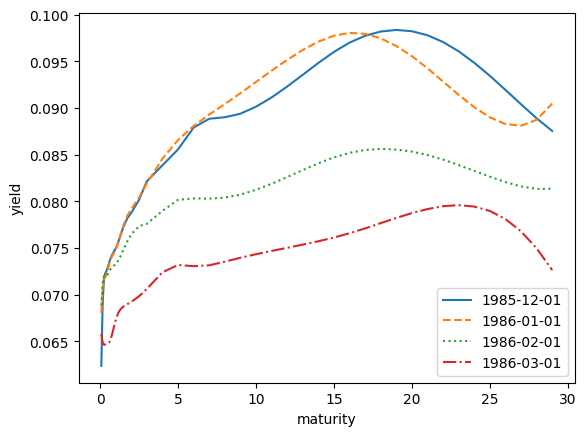

In [86]:
fig, ax = plt.subplots()
ax.set_xlabel('maturity')
ax.set_ylabel('yield')
for idx, lty in zip(idx_show, line_types):
    ax.plot(maturity['Maturity'], mk_zero2.iloc[idx], lty, label=mk_zero2.index[idx].strftime('%Y-%m-%d'))
ax.legend(loc='lower right')

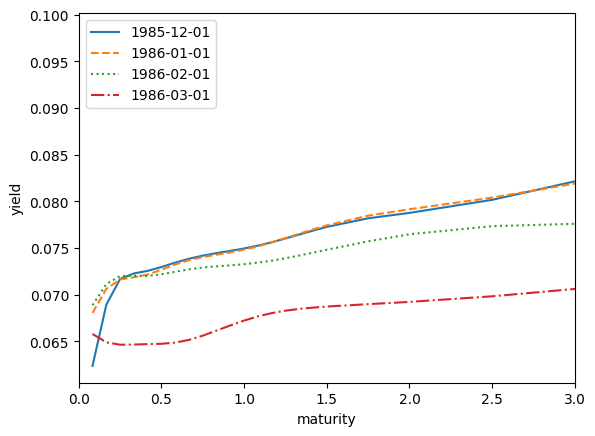

In [88]:
fig, ax = plt.subplots()
ax.set_xlabel('maturity')
ax.set_ylabel('yield')
for idx, lty in zip(idx_show, line_types):
    ax.plot(maturity['Maturity'], mk_zero2.iloc[idx], lty, label=mk_zero2.index[idx].strftime('%Y-%m-%d'))
ax.set_xlim([0, 3])
ax.legend(loc='upper left')

#### Problem 7

The yield curve shifts downwards between 1985-12-01 and 1986-03-01, with the overall shape of the curve remaining similar.

#### Problem 8

In [95]:
idx_show = [16, 17, 18, 19]
line_types = ['-', '--', ':', '-.']

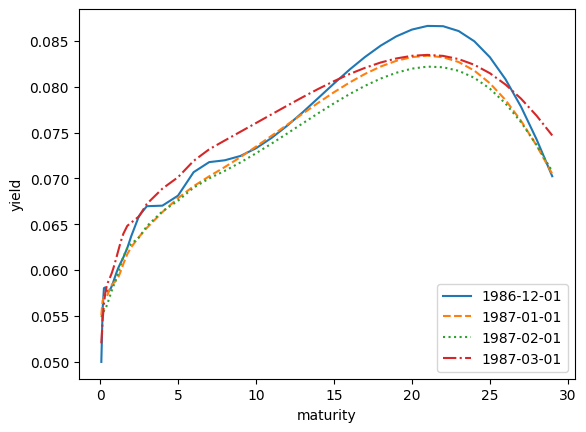

In [96]:
fig, ax = plt.subplots()
ax.set_xlabel('maturity')
ax.set_ylabel('yield')
for idx, lty in zip(idx_show, line_types):
    ax.plot(maturity['Maturity'], mk_zero2.iloc[idx], lty, label=mk_zero2.index[idx].strftime('%Y-%m-%d'))
ax.legend(loc='lower right')

The yield curve remained relatively stable in the period between 1986-12-01 and 1987-03-01.

In [121]:
int_forward = mk_zero2.mul(maturity['Maturity'].values, axis=1).dropna(axis=1, how='all')
maturities_available = maturity['Maturity'][:int_forward.shape[1]]
xs = np.linspace(0, 20, 200)
t_grid = (xs[1:] + xs[:-1]) / 2

In [120]:
idx_show = [4, 5, 6, 7]
line_types = ['-', '--', ':', '-.']

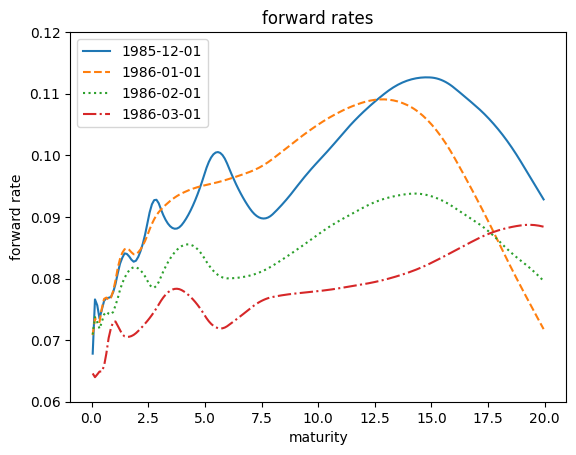

In [126]:
fig, ax = plt.subplots()
for idx, lty in zip(idx_show, line_types):
    interp = CubicSpline(maturities_available, int_forward.iloc[idx])
    forward = np.diff(interp(xs)) / np.diff(xs)
    ax.plot(t_grid, forward, lty, label=mk_zero2.index[idx].strftime('%Y-%m-%d'))
ax.set_ylim([0.06, 0.12])
ax.set_title('forward rates')
ax.set_xlabel('maturity')
ax.set_ylabel('forward rate')
ax.legend()